In [131]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as db

Справочники

In [2]:
members_df = pd.read_csv('data/Справочник участников оборота товаров.csv')

points_df = pd.read_csv('data/Справочник торговых точек.csv')

points_df.loc[points_df['region_code'] == 51, 'city_with_type'] = "Мурманская"
points_df.loc[points_df['region_code'] == 77, 'city_with_type'] = "Москва"
points_df.loc[points_df['region_code'] == 50, 'city_with_type'] = "Мо"
points_df.loc[points_df['region_code'] == 78, 'city_with_type'] = "Спб"
points_df['postal_code'] = points_df['postal_code'].fillna(0).astype(int)

products_df = pd.read_csv('data/Справочник продукции.csv')

products_df['country'] = products_df['country'].fillna('0')
products_df['volume'] = products_df['volume'].fillna(1)
products_df.loc[products_df['volume'] == "НЕ КЛАССИФИЦИРОВАНО", 'volume'] = 1

Join points and members

In [133]:
members_df.head(1)

,inn,region_code
0,60DFB6F87ABF6232A5D97A1A827F8D88,1


In [162]:
inn_points_region_code_equal = points_df.set_index('inn').join(members_df.set_index('inn')['region_code'], rsuffix='_inn').query("region_code == region_code_inn").index.unique()

In [180]:
inn_points_region_code_NOT_equal = set(members_df['inn'].unique()) - set(inn_points_region_code_equal)
inn_points_region_code_NOT_equal = np.array(list(inn_points_region_code_NOT_equal))
inn_points_region_code_NOT_equal.size

11274

Агрегированные

In [3]:
movement_df = pd.read_csv('data/Агрегированные данные о перемещениях товаров между участниками с 2021-11-22 по 2022-11-21.csv')
out_df = pd.read_csv('data/Агрегированные данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21.csv')
in_df = pd.read_csv('data/Агрегированные данные о вводе товаров в оборот с 2021-11-22 по 2022-11-21.csv')

Производитель

In [4]:
factory_in = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о вводе товаров в оборот с 2021-11-22 по 2022-11-21 один производитель.csv')
factory_out = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21 один производитель.csv')
factory_move = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о перемещениях товаров между участниками с 2021-11-22 по 2022-11-21 один производитель.csv')

In [135]:
factory_move.head(5)

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
0,2022-03-28,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,1141B8EB196FC9FE45B4FF3ED85F77DF,3300B49A222B322B9EA60CE45672178C,5
1,2022-03-28,42E4014F6E3023404F8B676D080EDDB0,DA62EC79660CF21AC37A260DA6F642C4,B6D3FC3661E47A30E2579CF85C81F179,DFE5BB9A38F0887450C94A05B5258D16,1
2,2022-03-28,8AD9201DF484BA62BFCDA93389BE2546,DA62EC79660CF21AC37A260DA6F642C4,5137D2202694EB65874BB604ACA4C56B,6E13702FD0C465A91622BA2492AEBC03,1
3,2022-03-28,777D245A6557001F2461B3F35E68A759,DA62EC79660CF21AC37A260DA6F642C4,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,1
4,2022-03-28,D5849F5C3693948DA91F02E989A0AC9A,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,C8719385CAB828EFE6FACB3D5304BF66,1


In [134]:
factory_out.head(5)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,F5DEEE4DB58DAE786ABB7ACC1339E7AC,Продажа конечному потребителю в точке продаж,1285,2
1,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,0CDC2604FE5051E46DA2A9ED5B318274,Продажа конечному потребителю в точке продаж,1285,2
2,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,5196C057F2C464323436C87B54DE6119,Продажа конечному потребителю в точке продаж,1128,1
3,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,29F8E31472B06FD89405AB4CF147D352,Продажа конечному потребителю в точке продаж,1285,2
4,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,E778C673254F2DE374B3EAB367FF3478,Продажа конечному потребителю в точке продаж,1285,1


Фильтрация

In [7]:
# factory_out = factory_out.query('type_operation == "Продажа конечному потребителю в точке продаж"')

Объединенные

In [8]:
factory_out_joined = factory_out.set_index('id_sp_').join(points_df.set_index('id_sp_')[['region_code','city_with_type', 'postal_code']]) \
.set_index('gtin').join(products_df.set_index('gtin')[['product_name', 'product_short_name', 'brand', 'country']])

In [9]:
factory_move_joined = factory_move.set_index('gtin').join(products_df.set_index('gtin')[['product_name', 'product_short_name', 'brand', 'country', 'volume']]) \
.set_index('sender_inn').join(members_df.set_index('inn')).reset_index().rename(columns={'index':'sender_inn'}).set_index('receiver_inn').join(members_df.set_index('inn'), rsuffix='_rec_inn').reset_index().rename(columns={'index':'receiver_inn'})

In [196]:
factory_out_joined = factory_out_joined.drop_duplicates()
factory_move_joined = factory_move_joined.drop_duplicates()

In [38]:
factory_out_joined['date'] = pd.to_datetime(factory_out_joined['dt'])
factory_move_joined['date'] = pd.to_datetime(factory_move_joined['dt'])

factory_out_joined['month'] = factory_out_joined['date'].dt.month
factory_move_joined['month'] = factory_move_joined['date'].dt.month

factory_out_joined['week'] = factory_out_joined['date'].dt.week
factory_move_joined['week'] = factory_move_joined['date'].dt.week

C:\Users\Dima\AppData\Local\Temp\ipykernel_12280\1978291963.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  factory_out_joined['week'] = factory_out_joined['date'].dt.week
C:\Users\Dima\AppData\Local\Temp\ipykernel_12280\1978291963.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  factory_move_joined['week'] = factory_move_joined['date'].dt.week


Фиильтрация

In [39]:
factory_out_joined = factory_out_joined.query("postal_code > 0")

Copy to SQL Lite

In [197]:
con = db.connect('./db_project\identifier.sqlite')
factory_out_joined.to_sql('factory_out_joined', con, if_exists='replace')
factory_move_joined.to_sql('factory_move_joined', con, if_exists='replace')

628223

In [12]:
# factory_out_joined.to_csv('factory_out_joined.csv')
# factory_move_joined.to_csv('factory_move_joined.csv')

In [40]:
factory_move_joined.head(5)

,receiver_inn,sender_inn,dt,prid,cnt_moved,product_name,product_short_name,brand,country,volume,region_code,region_code_rec_inn,date,month,week
0,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,22,54.0,2022-07-04,7,27
1,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,22,54.0,2022-07-04,7,27
2,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,22,54.0,2022-07-04,7,27
3,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,22,54.0,2022-07-04,7,27
4,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,100,22,54.0,2022-07-04,7,27


In [41]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month,week
gtin,,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36


In [16]:
factory_out_joined.sort_values(by='cnt', ascending=False).head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month
gtin,,,,,,,,,,,,,,,
B482F2136F3C04724E6D5EC4050B38DD,2022-10-06,DA62EC79660CF21AC37A260DA6F642C4,4060B78560B9DBBD7C59B77C0CB16183,Продажа конечному потребителю в точке продаж,1171,354,38.0,г Иркутск,664053.0,A4A0F5F9CEC6E5230852CAD5F2273A16,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-10-06,10
82679ED6AB16F320FC9566B50CBBA5E7,2022-10-06,DA62EC79660CF21AC37A260DA6F642C4,4060B78560B9DBBD7C59B77C0CB16183,Продажа конечному потребителю в точке продаж,1171,353,38.0,г Иркутск,664053.0,95E95A4E764D3241EF023BD21B595F00,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-10-06,10
06F4CAE6A2764D141E53C3AC8282CD36,2022-05-23,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,Продажа конечному потребителю в точке продаж,1357,179,38.0,г Иркутск,664039.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-05-23,5
06F4CAE6A2764D141E53C3AC8282CD36,2022-05-23,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,Продажа конечному потребителю в точке продаж,1357,179,38.0,г Иркутск,664039.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-05-23,5
06F4CAE6A2764D141E53C3AC8282CD36,2022-05-23,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,Продажа конечному потребителю в точке продаж,1357,179,38.0,г Иркутск,664039.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-05-23,5


In [17]:
factory_out[factory_out.type_operation != "Продажи за пределы РФ"];

In [18]:
factory_out.groupby(['dt']).count().sort_values(by='gtin',ascending=False)

,gtin,prid,inn,id_sp_,type_operation,price,cnt
dt,,,,,,,
2021-12-30,8521,8521,8521,7218,8521,8521,8521
2022-02-22,8321,8321,8321,6960,8321,8321,8321
2022-03-15,8126,8126,8126,6864,8126,8126,8126
2022-10-15,7942,7942,7942,7289,7942,7942,7942
2021-12-29,7938,7938,7938,6735,7938,7938,7938
...,...,...,...,...,...,...,...
2022-01-07,2977,2977,2977,2613,2977,2977,2977
2022-01-02,2779,2779,2779,2496,2779,2779,2779
2022-04-24,2546,2546,2546,2161,2546,2546,2546


In [19]:
# factory_out['date'] = pd.to_datetime(factory_out['dt']) 

In [20]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month
gtin,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9


In [21]:
zips = factory_out_joined['postal_code'].values

In [32]:
factory_out_joined['product_short_name'].values

array(['2868B842B46F754C088D89E130F89585',
       '2868B842B46F754C088D89E130F89585',
       '2868B842B46F754C088D89E130F89585', ...,
       'C6AD4B84092CCBB3E3729F73B00C55A1',
       'C6AD4B84092CCBB3E3729F73B00C55A1',
       'C6AD4B84092CCBB3E3729F73B00C55A1'], dtype=object)

In [33]:
factory_out_joined_part_one = factory_out_joined[factory_out_joined['product_short_name'] == 'C6AD4B84092CCBB3E3729F73B00C55A1']

Продажи по конкретному кода

In [34]:
factory_out_joined_part_one[factory_out_joined_part_one['postal_code'] == 665654.0].groupby(['dt']).count()['prid']

dt
2021-12-16     4
2021-12-30     8
2022-01-10     8
2022-03-16     8
2022-05-11     8
2022-06-13     8
2022-06-23    11
2022-08-16    11
2022-08-24     9
Name: prid, dtype: int64

По региону

In [35]:
factory_out_joined_part_one[factory_out_joined_part_one['region_code'] == 47].groupby(['month']).count()['prid']

month
1      7323
2      7753
3      8898
4      7697
5      7340
6      8306
7      7745
8      7368
9      6529
10     8984
11     9913
12    10094
Name: prid, dtype: int64

In [25]:
factory_out_joined_part_one.groupby(['postal_code']).count().sort_values(by='dt', ascending=False)['dt']

postal_code
109012.0    69076
119002.0    51673
115162.0    25614
190031.0    20595
129085.0    18176
            ...  
601442.0        2
300901.0        1
676790.0        1
601914.0        1
606480.0        1
Name: dt, Length: 6157, dtype: int64

In [26]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month
gtin,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9


In [57]:
factory_out_joined.query('region_code == 21')['month'].value_counts()

12    5998
10    5492
2     5035
11    4940
3     4931
1     3972
8     3938
9     3631
7     3581
4     3196
5     3047
6     2864
Name: month, dtype: int64

In [43]:
factory_out_joined['month'].value_counts()

12    832938
10    810342
3     779308
11    740000
7     696821
9     681254
8     673015
6     654792
2     631077
5     611965
4     602727
1     557863
Name: month, dtype: int64

In [44]:
factory_out_joined['week'].value_counts()

41    207353
11    199141
50    193776
46    193219
52    187132
51    186380
8     184717
47    184326
40    182787
10    180708
28    179110
9     177657
7     176543
45    176118
42    175175
43    173630
39    171424
44    169256
24    167409
37    166545
49    165944
33    165781
38    165023
12    159688
29    155760
32    154951
48    154295
15    153482
23    152631
25    151767
30    151132
34    150508
27    148499
35    144689
19    143970
36    143122
31    142287
21    142249
26    141992
20    141620
6     141557
13    141099
22    140369
17    139223
2     137332
14    137223
3     132710
18    131486
4     129470
16    128320
1     126245
5     125272
Name: week, dtype: int64

In [ ]:
Перемещение по short name region

In [207]:
factory_move_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code_rec_inn == 77").groupby(['receiver_inn']).count()['sender_inn'].sort_values(ascending=False)

receiver_inn
2BE02F3FE88C85D34B7B4A577DAA638D    9504
5C87E9B71FEC0A6A9C761D46F0B3EB9C    1168
E8A6B8662FA8612FD280AF241578B7DB     488
100126885D43649E573635E39F4AA256     288
F3907BFDD402FD883DCCEE92AF490A74     242
                                    ... 
116F86DBED0E8DA4DDA77FB20E895CD4       2
F8B7A1EFB18987AA0041ACDAB466DBFE       2
A6BBE8789CED6F736FEB0C50A78CDEE4       1
9E1AB90C2E52AFAA2A85DFF3AEF1533E       1
32426EB401EDE23FC0424C026FF83F55       1
Name: sender_inn, Length: 129, dtype: int64

In [213]:
points_df.query("inn == 'F3907BFDD402FD883DCCEE92AF490A74'")

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code


In [201]:
factory_move_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code_rec_inn == 77").groupby(['week']).count()['receiver_inn']

week
1      44
2     292
3     349
4     279
5     284
6     270
7     385
8     271
9     400
10    172
11    238
12    239
13    267
14    194
15    274
16    259
17    276
18    193
19    203
20    360
21    376
22    398
23    366
24    253
25    296
26    343
27    320
28    298
29    339
30    306
31    260
32    269
33    278
34    251
35    232
36    204
37    223
38    260
39    227
40    228
41    295
42    320
43    253
44    285
45    397
46    358
47    479
48    406
49    427
50    446
51    400
52    256
Name: receiver_inn, dtype: int64

In [198]:
one_good_type_region = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77")

In [79]:
one_good_type_region['week'].value_counts().sort_index().to_csv('one_good_type_region.csv')

In [77]:
one_good_type_region['week'].value_counts().sort_index().cumsum().to_csv('one_good_type_region.csv')

In [85]:
zips = factory_out_joined.query("region_code == 77.0")['postal_code'].unique()

In [86]:
# zips = zips.astype(int)
# pd.DataFrame(zips).to_csv("moscow zips.csv")

In [97]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").groupby(['region_code']).count().sort_values(by='dt', ascending=False).head(14)

,dt,prid,inn,type_operation,price,cnt,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month,week
region_code,,,,,,,,,,,,,,,
77.0,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476,75476
50.0,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320,20320
78.0,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539
26.0,9839,9839,9839,9839,9839,9839,9820,9839,9839,9839,9839,9839,9839,9839,9839
66.0,5180,5180,5180,5180,5180,5180,5179,5180,5180,5180,5180,5180,5180,5180,5180
23.0,4898,4898,4898,4898,4898,4898,4819,4898,4898,4898,4898,4898,4898,4898,4898
36.0,4840,4840,4840,4840,4840,4840,4298,4840,4840,4840,4840,4840,4840,4840,4840
63.0,4424,4424,4424,4424,4424,4424,4411,4424,4424,4424,4424,4424,4424,4424,4424
61.0,3984,3984,3984,3984,3984,3984,3251,3984,3984,3984,3984,3984,3984,3984,3984


<AxesSubplot:>

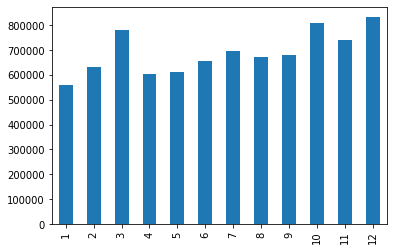

In [106]:
factory_out_joined['month'].value_counts().sort_index().plot(x='index', kind='bar')

In [112]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").groupby(['region_code', 'week']).count().sort_values(by='dt', ascending=False)['dt'].sort_values()

region_code  week
1.0          1          1
45.0         33         1
46.0         44         1
60.0         25         1
45.0         26         1
                     ... 
77.0         50      1983
             9       2040
             1       2218
             51      2391
             52      2438
Name: dt, Length: 3155, dtype: int64

In [119]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77").count()

dt                    75476
prid                  75476
inn                   75476
type_operation        75476
price                 75476
cnt                   75476
region_code           75476
city_with_type        75476
postal_code           75476
product_name          75476
product_short_name    75476
brand                 75476
country               75476
date                  75476
month                 75476
week                  75476
dtype: int64

In [121]:
data_1 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77")['week'].value_counts().sort_index()
data_2 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 55")['week'].value_counts().sort_index()

<AxesSubplot:>

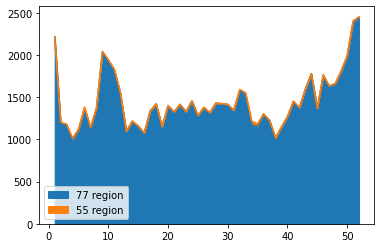

In [130]:
pd.DataFrame({'77 region':data_1, '55 region': data_2}).plot(kind='area') # plt.stackplot()

Оборачиваемость по продукту на регион 

нужно добавить остатки

вуручка* остаток по месяцам * 12

In [186]:
one_good_type_region['price'].sum()

965326860